In [73]:
# Kinematic chain define
import numpy as np
import matplotlib.pyplot as plt

class Rot:
    def x(theta):
        theta = np.deg2rad(theta)
        return np.array([[1,0,0],
                         [0,np.cos(theta),-np.sin(theta)],
                         [0,np.sin(theta),np.cos(theta)]])
    def y(theta):
        theta = np.deg2rad(theta)
        return np.array([[np.cos(theta), 0, np.sin(theta)],
                         [0,1,0],
                         [-np.sin(theta),0, np.cos(theta)]])
    def z(theta):
        theta = np.deg2rad(theta)
        return np.array([[np.cos(theta),-np.sin(theta),0],
                         [np.sin(theta),np.cos(theta), 0],
                         [0,0,1]])
    
class HT_matrix:
    def R0to1(theta):
        return Rot.z(theta)
    def p0to1(length):
        return np.array([0,0,-length])
    
    def R1to2(theta):
        return Rot.z(theta)
    def p1to2(length):
        return np.array([0,-length,0])
    
    def R2to3(theta):
        return Rot.x(theta)
    def p2to3(length):
        return np.array([0,-length,0])
    
    def R3to4(theta):
        return Rot.y(theta)
    def p3to4(length):
        return np.array([0,-length,0])
    
    def R4to5(theta):
        return Rot.y(theta)
    def p4to5(length):
        return np.array([0,0,-length])
    
    def R5to6(theta):
        return Rot.y(theta)
    def p5to6(length):
        return np.array([0,0,-length])
    
    def R6to7(theta):
        return Rot.x(theta)
    def p6to7(length):
        return np.array([0,0,-length])
        

def FK_method(theta_data,length_data):
    #변수 및 행렬 초기화
    j=0
    k=0
    R = [0 for i in theta_data]
    R_result = [0 for i in theta_data]
    P = [0 for i in length_data]
    P_result = [0 for i in length_data]
    
    #theta_data : 7개의 joint variable 행렬
    theta_data = np.deg2rad(theta_data) 
    R_matrix = [HT_matrix.R0to1,HT_matrix.R1to2,HT_matrix.R2to3,HT_matrix.R3to4,
                         HT_matrix.R4to5,HT_matrix.R5to6,HT_matrix.R6to7]
    P_matrix = [HT_matrix.p0to1,HT_matrix.p1to2,HT_matrix.p2to3,HT_matrix.p3to4,
                         HT_matrix.p4to5,HT_matrix.p5to6,HT_matrix.p6to7]
    
    for i in theta_data:
        
        R[j] = R_matrix[j](i)
        
        if j == 0:
            R_result[j] = R[j]
            
        else:
            R_result[j] = np.dot(R[j-1],R[j])
            
        j=j+1
    
    for i in length_data:
        
        P[k] = P_matrix[k](i)
        
        if k == 0:
            P_result[k] = P[k]
            
        else:
            P_result[k] = np.dot(R[k-1],P[k]) + P_result[k-1]
        
        k=k+1
        
    return R_result, P_result, R, P
        

theta_data = [0 for i in range(7)]
length_data = [2 for i in range(7)]

R_result, P_result, R, P = FK_method(theta_data,length_data)

P_result


[array([ 0,  0, -2]),
 array([ 0., -2., -2.]),
 array([ 0., -4., -2.]),
 array([ 0., -6., -2.]),
 array([ 0., -6., -4.]),
 array([ 0., -6., -6.]),
 array([ 0., -6., -8.])]

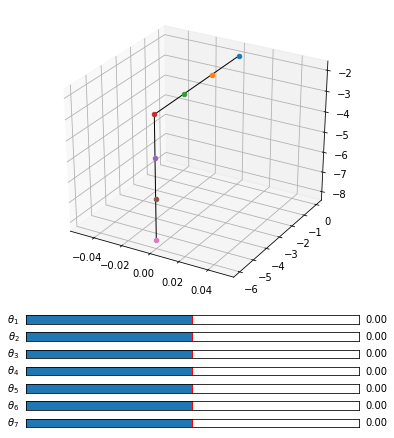

[ 0. -2. -2.]


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
def drawVector(fig, pointA, pointB, **kwargs):
    ms = kwargs.get('mutation_scale', 20)
    ars = kwargs.get('arrowstyle', '-')
    lc = kwargs.get('lineColor', 'k')
    pc = kwargs.get('projColor', 'k')
    pointEnable = kwargs.get('pointEnable', True)
    projOn = kwargs.get('proj', True)
    lineStyle = kwargs.get('lineStyle', '-')
    annotationString = kwargs.get('annotationString', '')
    lineWidth = kwargs.get('lineWidth', 1)

    if (3 <= pointA.size <= 4):
        xs = [pointA[0], pointB[0]]
        ys = [pointA[1], pointB[1]]
        zs = [pointA[2], pointB[2]]
    else:
        xs = [pointA[0,3], pointB[0,3]]
        ys = [pointA[1,3], pointB[1,3]]
        zs = [pointA[2,3], pointB[2,3]]

    out = Arrow3D(xs, ys, zs, mutation_scale=ms, arrowstyle=ars, color=lc, linestyle=lineStyle, linewidth=lineWidth)
    fig.add_artist(out)

#     if pointEnable: fig.scatter(xs[1], ys[1], zs[1], color='k', s=50)

#     if projOn:
#         fig.plot(xs, ys, [0, 0], color=pc, linestyle='--')
#         fig.plot([xs[0], xs[0]], [ys[0], ys[0]], [0, zs[0]], color=pc, linestyle='--')
#         fig.plot([xs[1], xs[1]], [ys[1], ys[1]], [0, zs[1]], color=pc, linestyle='--')

#     if annotationString != '':
#         fig.text(xs[1], ys[1], zs[1], annotationString, size=15, zorder=1, color='k') 
        
#visualization
def update(val):
    th1 = s1Angle.val
    th2 = s2Angle.val
    th3 = s3Angle.val
    th4 = s4Angle.val
    th5 = s5Angle.val
    th6 = s6Angle.val
    th7 = s7Angle.val
    
    theta_data = [th1,th2,th3,th4,th5,th6,th7]
    R_result, P_result, R, P = FK_method(theta_data,length_data)
    
    ax.cla()
    
    ax.scatter(P_result[0][0],P_result[0][1],P_result[0][2])
    ax.scatter(P_result[1][0],P_result[1][1],P_result[1][2])
    ax.scatter(P_result[2][0],P_result[2][1],P_result[2][2])
    ax.scatter(P_result[3][0],P_result[3][1],P_result[3][2])
    ax.scatter(P_result[4][0],P_result[4][1],P_result[4][2])
    ax.scatter(P_result[5][0],P_result[5][1],P_result[5][2])
    ax.scatter(P_result[6][0],P_result[6][1],P_result[6][2])

    drawVector(ax,P_result[0],P_result[1])
    drawVector(ax,P_result[1],P_result[2])
    drawVector(ax,P_result[2],P_result[3])
    drawVector(ax,P_result[3],P_result[4])
    drawVector(ax,P_result[4],P_result[5])
    drawVector(ax,P_result[5],P_result[6])
    
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
plt.subplots_adjust(bottom=0.50,top=1.5)

th1Angle = plt.axes([0.125, 0.40, 0.77, 0.03])
th2Angle = plt.axes([0.125, 0.34, 0.77, 0.03])
th3Angle = plt.axes([0.125, 0.28, 0.77, 0.03])
th4Angle = plt.axes([0.125, 0.22, 0.77, 0.03])
th5Angle = plt.axes([0.125, 0.16, 0.77, 0.03])
th6Angle = plt.axes([0.125, 0.10, 0.77, 0.03])
th7Angle = plt.axes([0.125, 0.04, 0.77, 0.03])

s1Angle = Slider(th1Angle, r'$ \theta_1 $', -90.0, 90.0, valinit=0)
s2Angle = Slider(th2Angle, r'$ \theta_2 $', -90.0, 90.0, valinit=0)
s3Angle = Slider(th3Angle, r'$ \theta_3 $', -90.0, 90.0, valinit=0)
s4Angle = Slider(th4Angle, r'$ \theta_4 $', -90.0, 90.0, valinit=0)
s5Angle = Slider(th5Angle, r'$ \theta_5 $', -90.0, 90.0, valinit=0)
s6Angle = Slider(th6Angle, r'$ \theta_6 $', -90.0, 90.0, valinit=0)
s7Angle = Slider(th7Angle, r'$ \theta_7 $', -90.0, 90.0, valinit=0)    

ax.scatter(P_result[0][0],P_result[0][1],P_result[0][2])
ax.scatter(P_result[1][0],P_result[1][1],P_result[1][2])
ax.scatter(P_result[2][0],P_result[2][1],P_result[2][2])
ax.scatter(P_result[3][0],P_result[3][1],P_result[3][2])
ax.scatter(P_result[4][0],P_result[4][1],P_result[4][2])
ax.scatter(P_result[5][0],P_result[5][1],P_result[5][2])
ax.scatter(P_result[6][0],P_result[6][1],P_result[6][2])

drawVector(ax,P_result[0],P_result[1])
drawVector(ax,P_result[1],P_result[2])
drawVector(ax,P_result[2],P_result[3])
drawVector(ax,P_result[3],P_result[4])
drawVector(ax,P_result[4],P_result[5])
drawVector(ax,P_result[5],P_result[6])

s1Angle.on_changed(update)
s2Angle.on_changed(update)
s3Angle.on_changed(update)
s4Angle.on_changed(update)
s5Angle.on_changed(update)
s6Angle.on_changed(update)
s7Angle.on_changed(update)

#ax.view_init(azim=-150, elev=30)
plt.show()

print(P_result[1])